# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
data = Path("../Resources/music.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [4]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values
y = df.iloc[:, 68:70].values

In [5]:
# Split the data into training and testing sets using the train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [10]:
# Scale the data for the features set X_tain and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

# YOUR CODE HERE!
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Create a neural network with 1 hidden layer
# YOUR CODE HERE!
nn = Sequential()
nn.add(Dense(units=8, input_dim=67, activation="relu"))
nn.add(Dense(units=2, activation="linear"))

In [12]:
# Compile model
# YOUR CODE HERE!
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
# Fit the model
# YOUR CODE HERE!
model_1 = nn.fit(X_train_scaled, y_train, epochs=800, verbose=0)

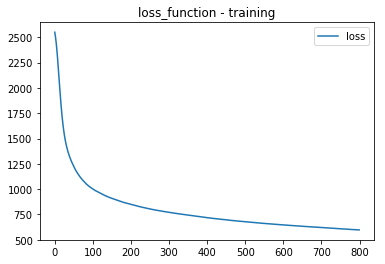

In [13]:
# Plot the training loss function
# YOUR CODE HERE!
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(model_1.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

In [16]:
# Save model as JSON
# YOUR CODE HERE!
nn_json = nn.to_json()
file_path = Path("../Resources/model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

file_path = Path("../Resources/model.h5")
nn.save_weights(file_path)

AttributeError: 'WindowsPath' object has no attribute 'endswith'

In [10]:
# Load the model to predict values
# YOUR CODE HERE!

# load json and create model
# YOUR CODE HERE!

# load weights into new model
# YOUR CODE HERE!

In [11]:
# Predict values using the testing data
# YOUR CODE HERE!

In [12]:
# Evaluate the model with the MSE metric
# YOUR CODE HERE!